# **`03 Verificar modelo`**

Verificamos si esta respondiendo bien el modelo guardado en en notebook 02, pasando algunas imagenes descargadas de internet

In [ ]:
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

# Configuración
IMG_SIZE = 64

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
import json
import numpy as np

def load_labels(filename):
    with open(filename, 'r') as f:
        return json.load(f)

# Cargar el modelo y las etiquetas
model = load_model('/content/drive/MyDrive/ProyectoFotos/Modelo/face_recognition_model.h5')
label_mapping = load_labels('/content/drive/MyDrive/ProyectoFotos/JSON/face_recognition_model.json')

# Invertir el mapeo para obtener los nombres de las etiquetas
label_names = {v: k for k, v in label_mapping.items()}

In [ ]:
label_names

{0: 'Angelina Jolie',
 1: 'Brad Pitt',
 2: 'Denzel Washington',
 3: 'Hugh Jackman',
 4: 'Jennifer Lawrence',
 5: 'Johnny Depp',
 6: 'Kate Winslet',
 7: 'Leonardo DiCaprio',
 8: 'Megan Fox',
 9: 'Natalie Portman',
 10: 'Nicole Kidman',
 11: 'Robert Downey Jr',
 12: 'Sandra Bullock',
 13: 'Scarlett Johansson',
 14: 'Tom Cruise',
 15: 'Tom Hanks',
 16: 'Will Smith'}

In [ ]:
import numpy as np
import os
import cv2
from tensorflow.keras import layers, Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
def preprocess_image(image, target_size=(64, 64)):
    # Convertir a RGB si es necesario
    if len(image.shape) == 2 or image.shape[2] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    elif image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detección facial
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) > 0:
        x, y, w, h = faces[0]
        face = image[y:y+h, x:x+w]
    else:
        print("No se detectó ninguna cara, usando la imagen completa.")
        return None

    # Redimensionar
    face = cv2.resize(face, target_size)

    # Normalizar
    face = face.astype(np.float32) / 255.0

    return face

In [ ]:
def identify_person2(image_path):
    # Cargar la imagen
    img = cv2.imread(image_path)
    if img is None:
        print(f"No se pudo cargar la imagen: {image_path}")
        return None, 0

    # Preprocesar la imagen
    processed_img = preprocess_image(img, target_size=(IMG_SIZE, IMG_SIZE))

    if processed_img is None:
        print("No se pudo procesar la imagen.")
        return None, 0

    # Preparar la imagen para la predicción
    img_array = np.expand_dims(processed_img, axis=0)

    # Realizar la predicción
    prediction = model.predict(img_array)  # Cambiado de img a img_array
    person_index = np.argmax(prediction)
    confidence = prediction[0][person_index]

    # Si la confianza es menor a 0.85, retornar None
    if confidence < 0.85:
        return None, confidence


    person_name = label_names[person_index]
    return person_name, confidence

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Persona identificada: Megan Fox 
 con confianza: 1.00


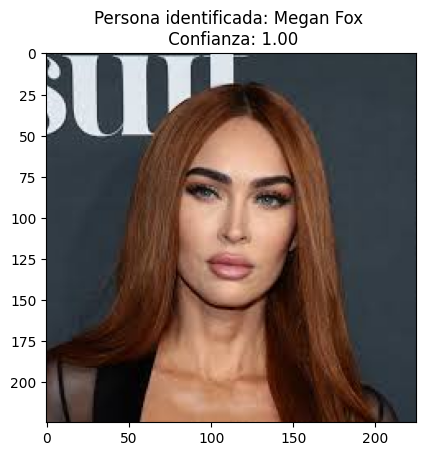

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Ejemplo de uso
new_image_path = '/content/drive/MyDrive/ProyectoFotos/MeganFox.jpeg'
identified_person, confidence = identify_person2(new_image_path)


# Mostrar el resultado
if identified_person:
    plt.title(f'Persona identificada: {identified_person} \n Confianza: {confidence:.2f}')
    print(f'Persona identificada: {identified_person} \n con confianza: {confidence:.2f}')
else:
    plt.title(f'No se pudo identificar a la persona \n Confianza: {confidence:.2f}')
    print(f'No se pudo identificar a la persona \n Confianza: {confidence:.2f}')



img = mpimg.imread(new_image_path)
imgplot = plt.imshow(img)
plt.show()